# Notebook Overview:
...

In [30]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

## Data Collection

In [31]:
# Install Kaggle CLI
!pip install kaggle

In [32]:
# Download Kaggle dataset to cwd
!kaggle datasets download -d wkirgsn/electric-motor-temperature -p data/ --unzip


  0%|          | 0.00/117M [00:00<?, ?B/s]
  1%|          | 1.00M/117M [00:00<00:24, 4.89MB/s]
  3%|2         | 3.00M/117M [00:00<00:10, 11.1MB/s]
  5%|5         | 6.00M/117M [00:00<00:07, 16.2MB/s]
  8%|7         | 9.00M/117M [00:00<00:05, 19.2MB/s]
 10%|#         | 12.0M/117M [00:00<00:05, 20.2MB/s]
 13%|#2        | 15.0M/117M [00:00<00:04, 21.4MB/s]
 15%|#5        | 18.0M/117M [00:00<00:04, 24.0MB/s]
 18%|#8        | 21.0M/117M [00:01<00:04, 22.2MB/s]
 21%|##        | 24.0M/117M [00:01<00:04, 22.8MB/s]
 23%|##3       | 27.0M/117M [00:01<00:04, 22.7MB/s]
 26%|##5       | 30.0M/117M [00:01<00:04, 21.9MB/s]
 28%|##8       | 33.0M/117M [00:01<00:03, 23.7MB/s]
 31%|###       | 36.0M/117M [00:01<00:03, 22.5MB/s]
 33%|###3      | 39.0M/117M [00:01<00:03, 23.3MB/s]
 36%|###6      | 42.0M/117M [00:02<00:03, 24.3MB/s]
 39%|###8      | 45.0M/117M [00:02<00:02, 25.5MB/s]
 41%|####1     | 48.0M/117M [00:02<00:02, 26.1MB/s]
 44%|####3     | 51.0M/117M [00:02<00:02, 26.8MB/s]
 46%|####6     | 54.

In [33]:
# Read csv
filepath = '..\data\measures_v2.csv'
#for chunk in pd.read_csv(filepath, chunksize=1000):
data = pd.read_csv(filepath)

In [34]:
# Print csv shape to see what we're working with
print(data.shape)

(1330816, 13)


# Data Definition

In [35]:
# Get a summary of the data: column names, data types
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1330816 entries, 0 to 1330815
Data columns (total 13 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   u_q             1330816 non-null  float64
 1   coolant         1330816 non-null  float64
 2   stator_winding  1330816 non-null  float64
 3   u_d             1330816 non-null  float64
 4   stator_tooth    1330816 non-null  float64
 5   motor_speed     1330816 non-null  float64
 6   i_d             1330816 non-null  float64
 7   i_q             1330816 non-null  float64
 8   pm              1330816 non-null  float64
 9   stator_yoke     1330816 non-null  float64
 10  ambient         1330816 non-null  float64
 11  torque          1330816 non-null  float64
 12  profile_id      1330816 non-null  int64  
dtypes: float64(12), int64(1)
memory usage: 132.0 MB
None


In [36]:
# Check for None values
print(data.isna().any())

# Check for null values
print() # space between outputs
print(data.isnull().any())

u_q               False
coolant           False
stator_winding    False
u_d               False
stator_tooth      False
motor_speed       False
i_d               False
i_q               False
pm                False
stator_yoke       False
ambient           False
torque            False
profile_id        False
dtype: bool

u_q               False
coolant           False
stator_winding    False
u_d               False
stator_tooth      False
motor_speed       False
i_d               False
i_q               False
pm                False
stator_yoke       False
ambient           False
torque            False
profile_id        False
dtype: bool


## Visualize data

### Histograms

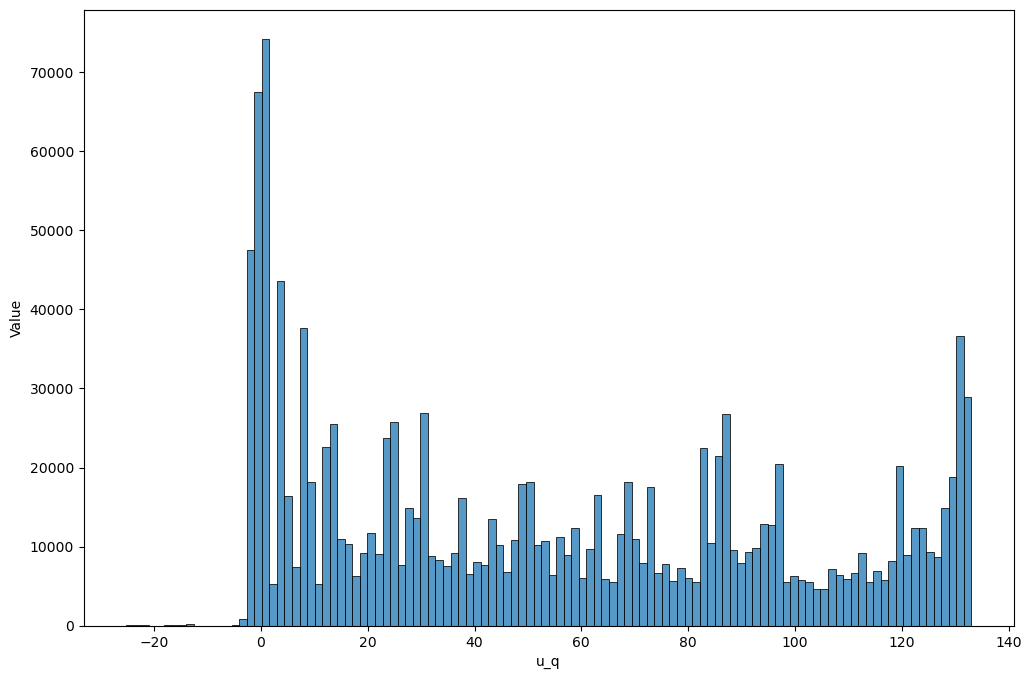

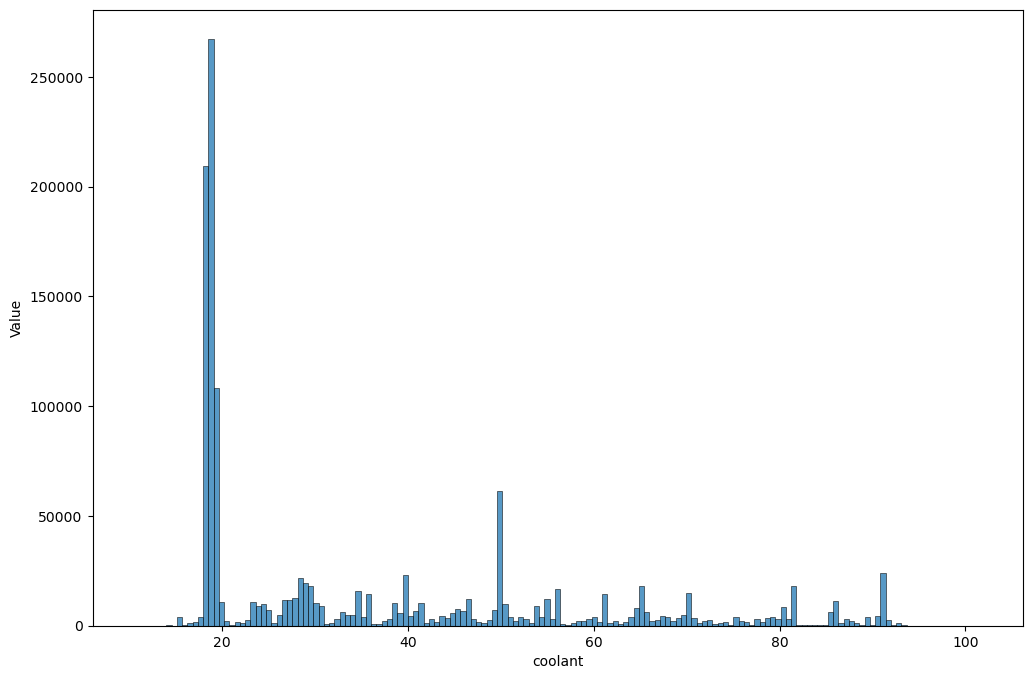

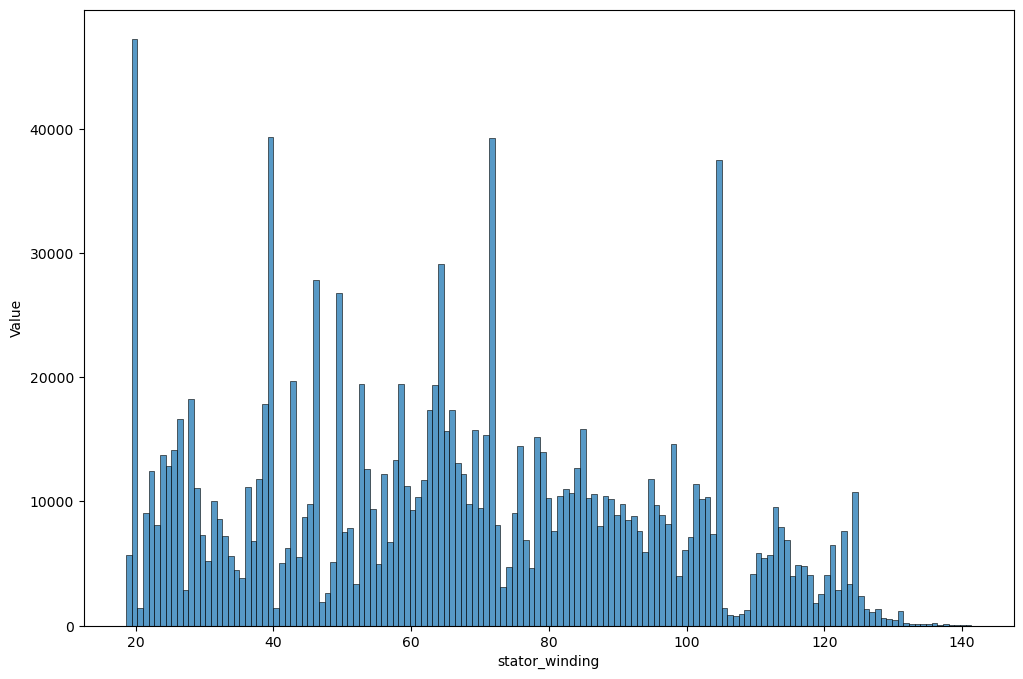

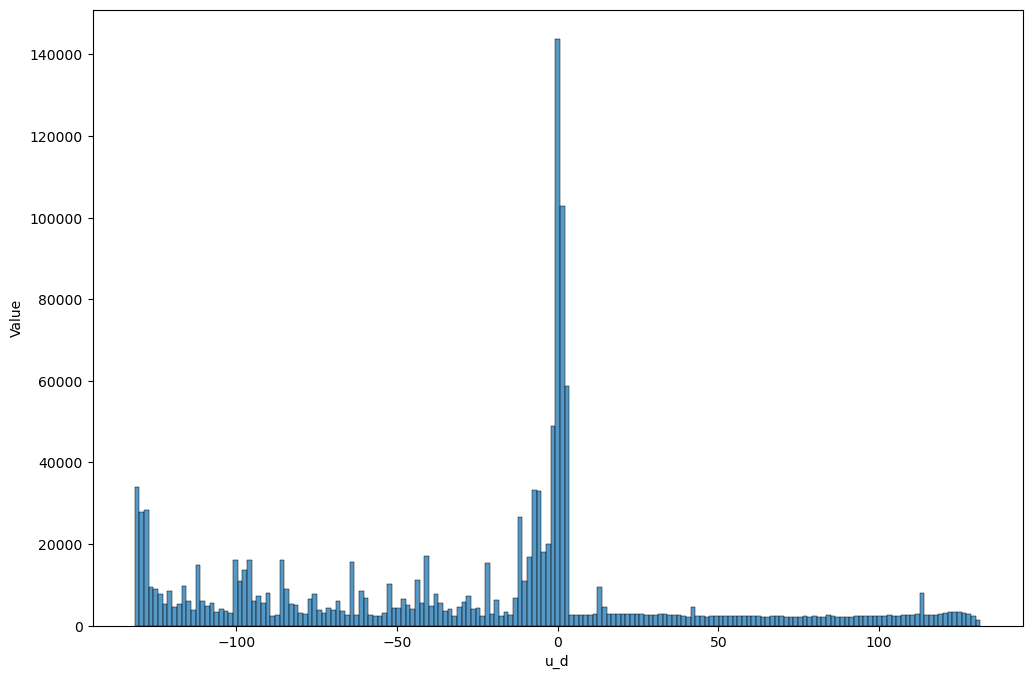

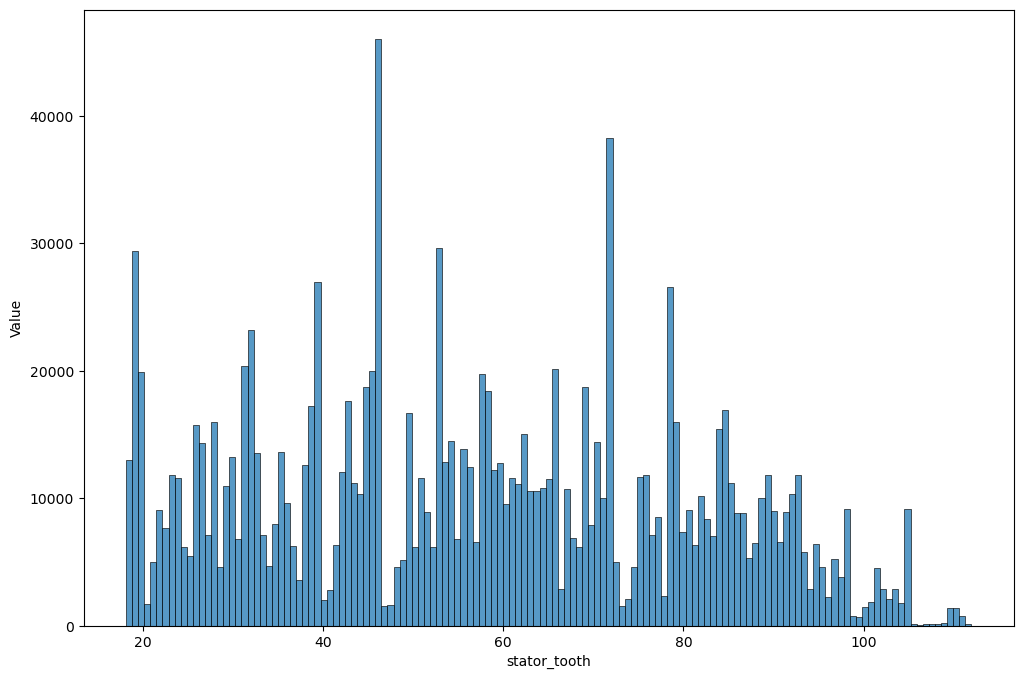

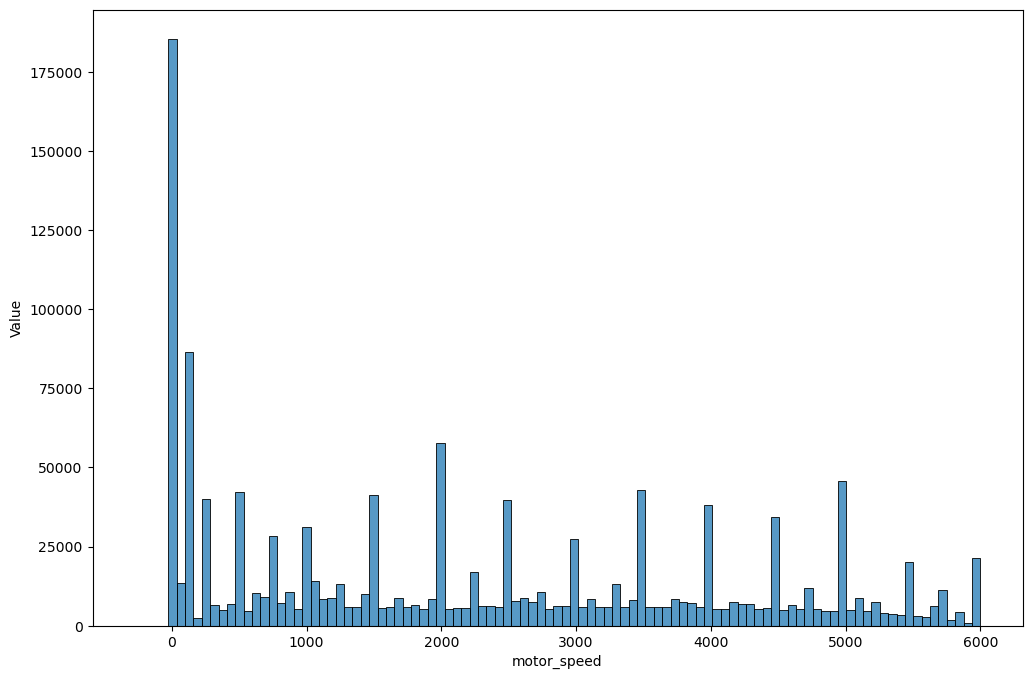

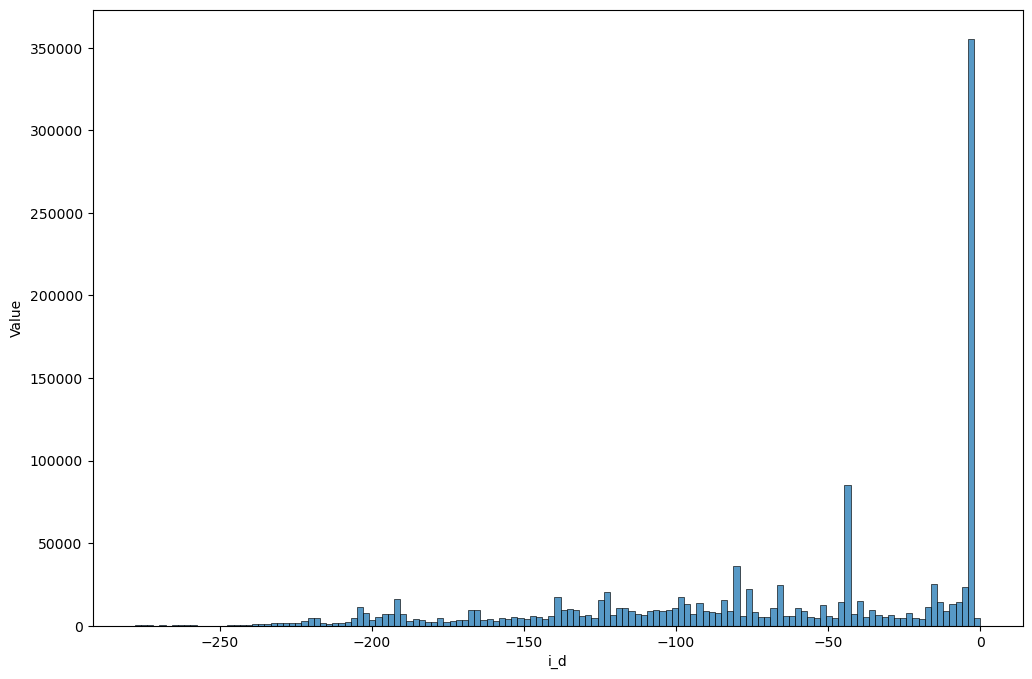

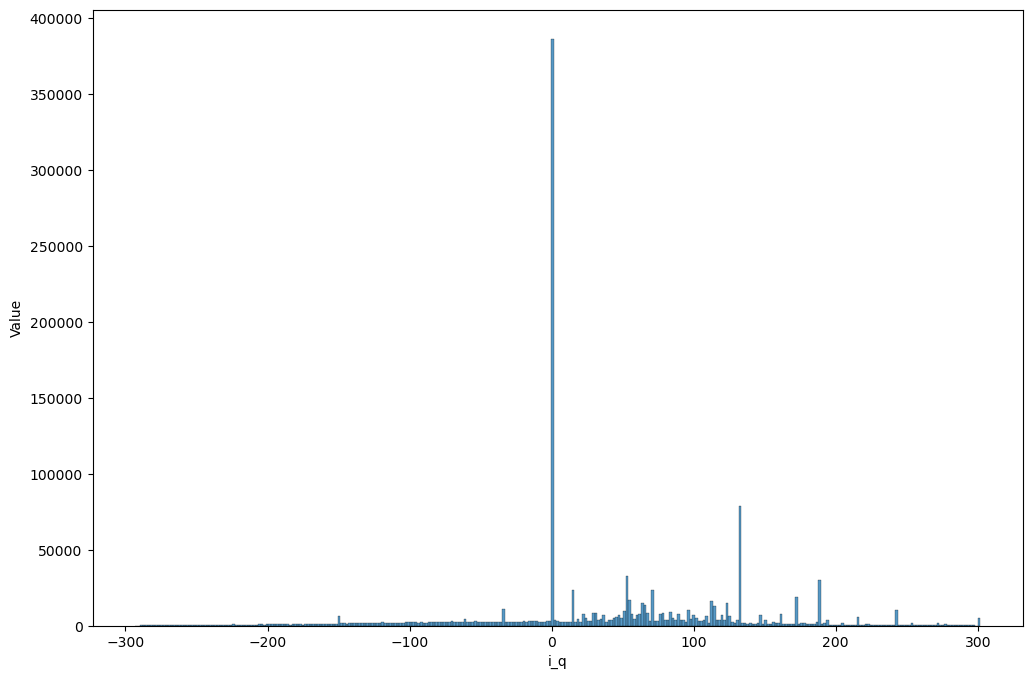

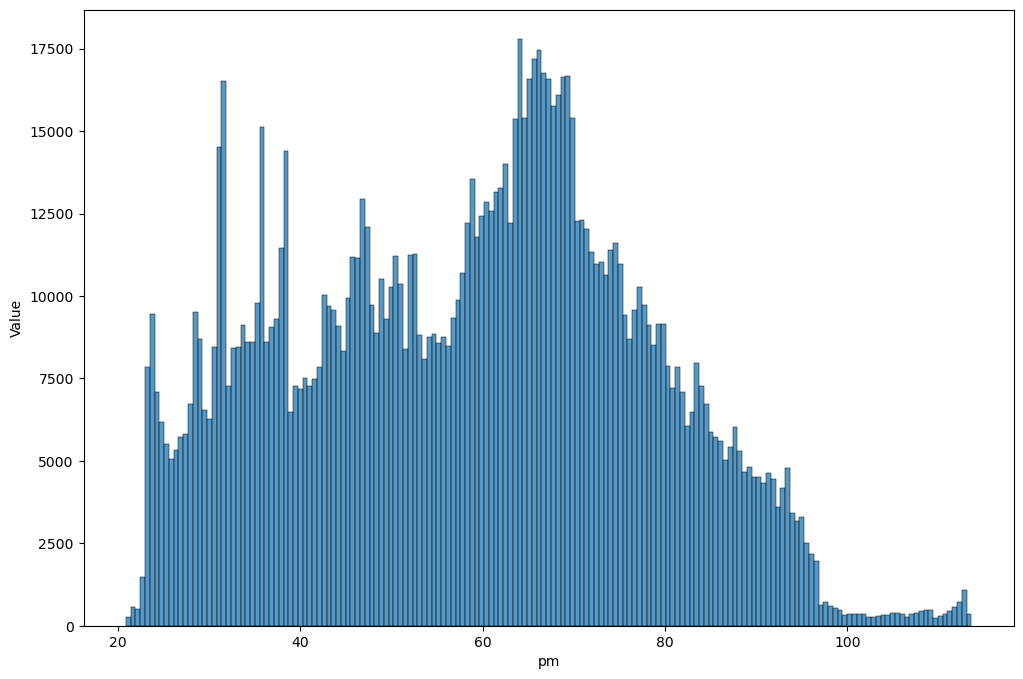

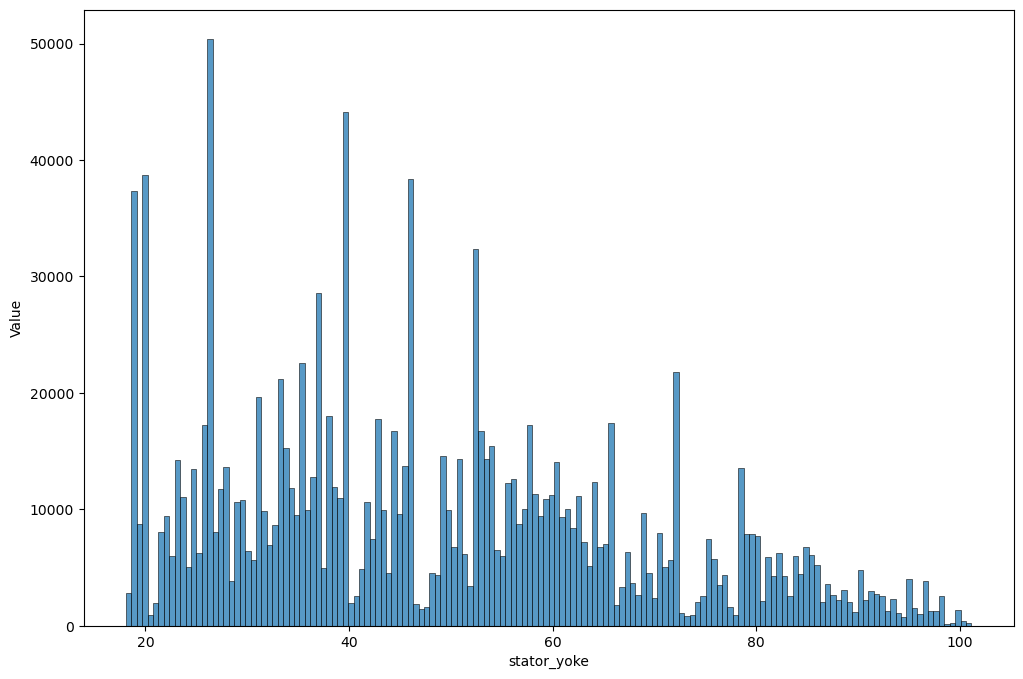

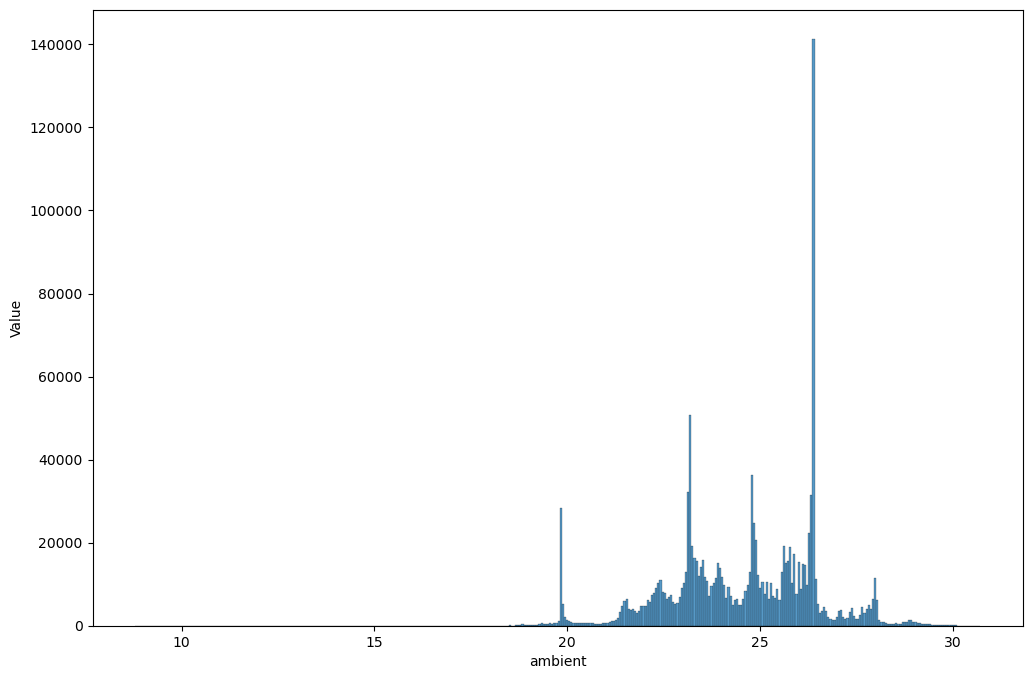

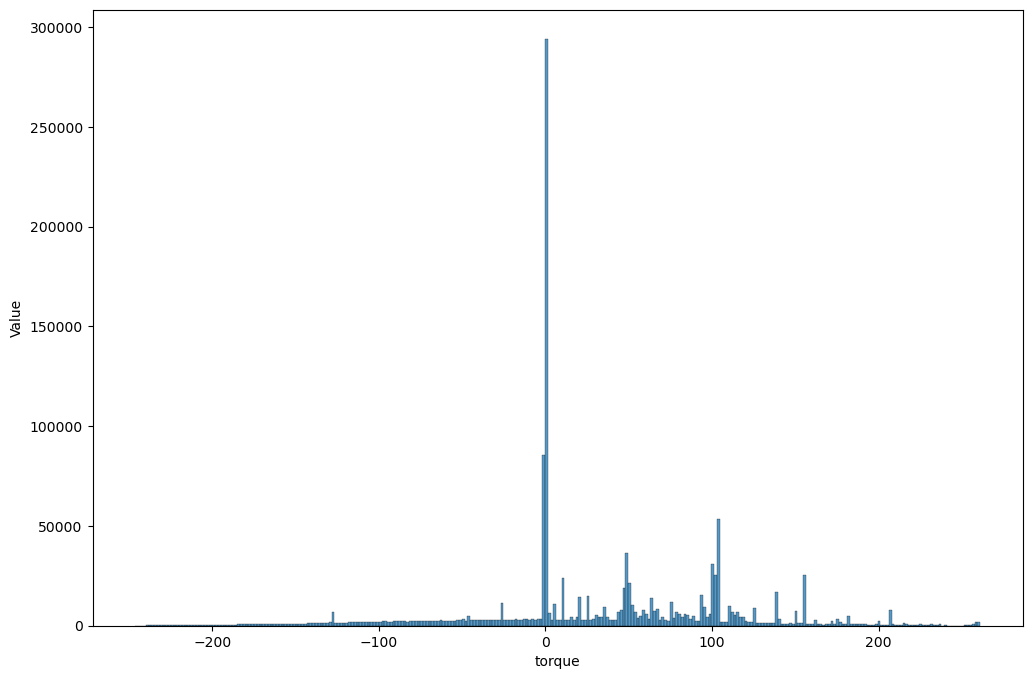

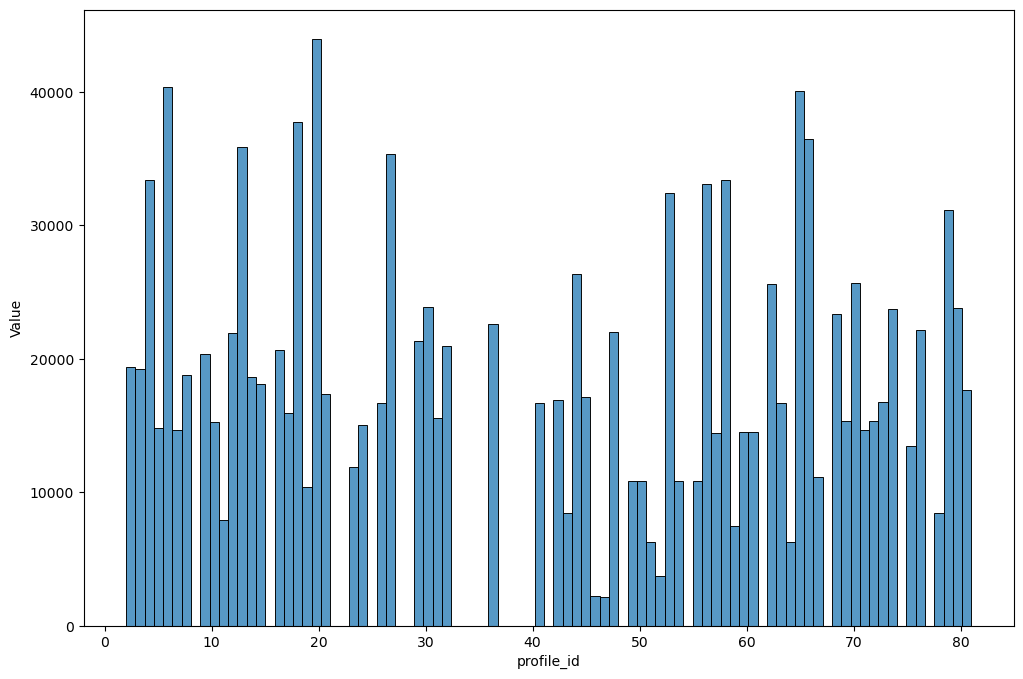

In [37]:
# View histograms of variable data
for var in data.columns:
    plt.subplots(figsize=(12, 8))
    sns.histplot(data=data, x=var)
    plt.ylabel('Value')
    plt.xlabel(var)

### Box plots

In [38]:
# Melt dataframe by var
def melt_by_profile_id(df, var):
    return pd.melt(df[['profile_id', var]], id_vars=['profile_id'], value_vars=None, var_name=None, value_name='value')

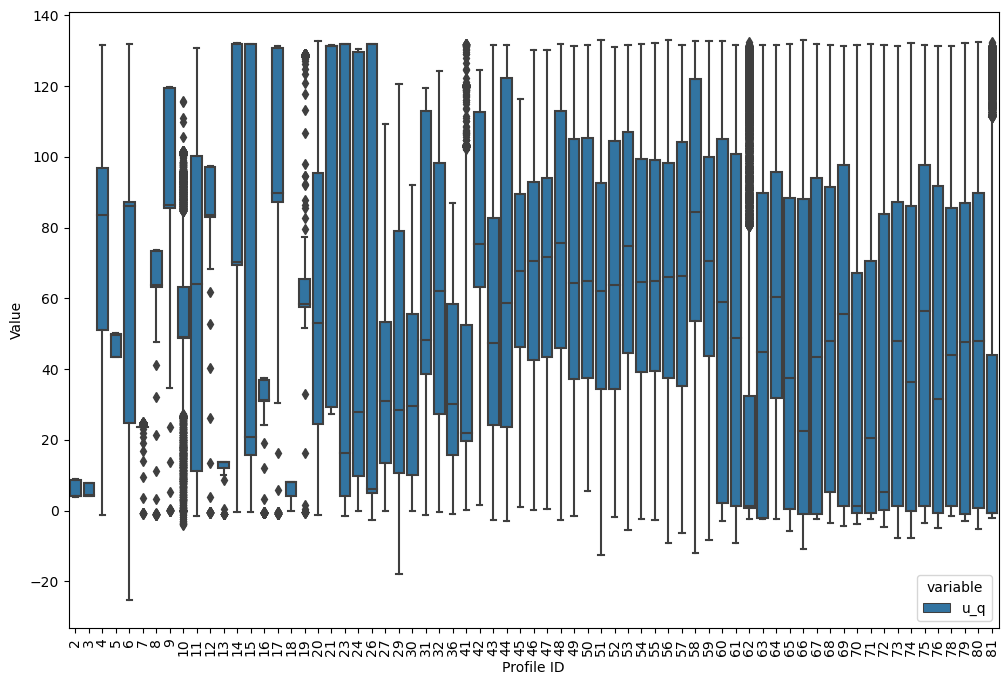

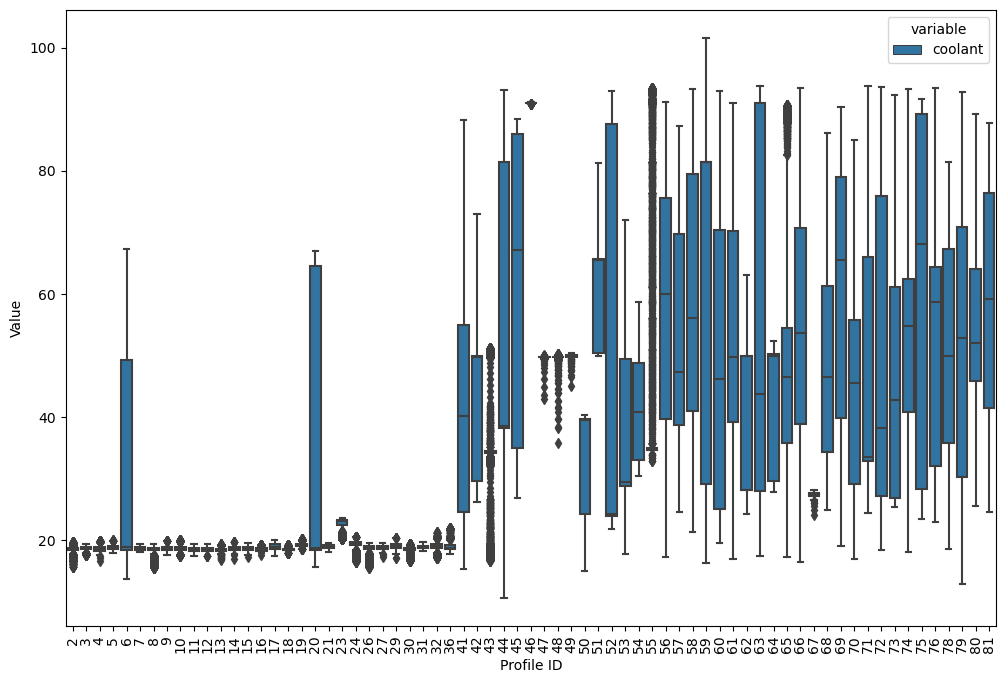

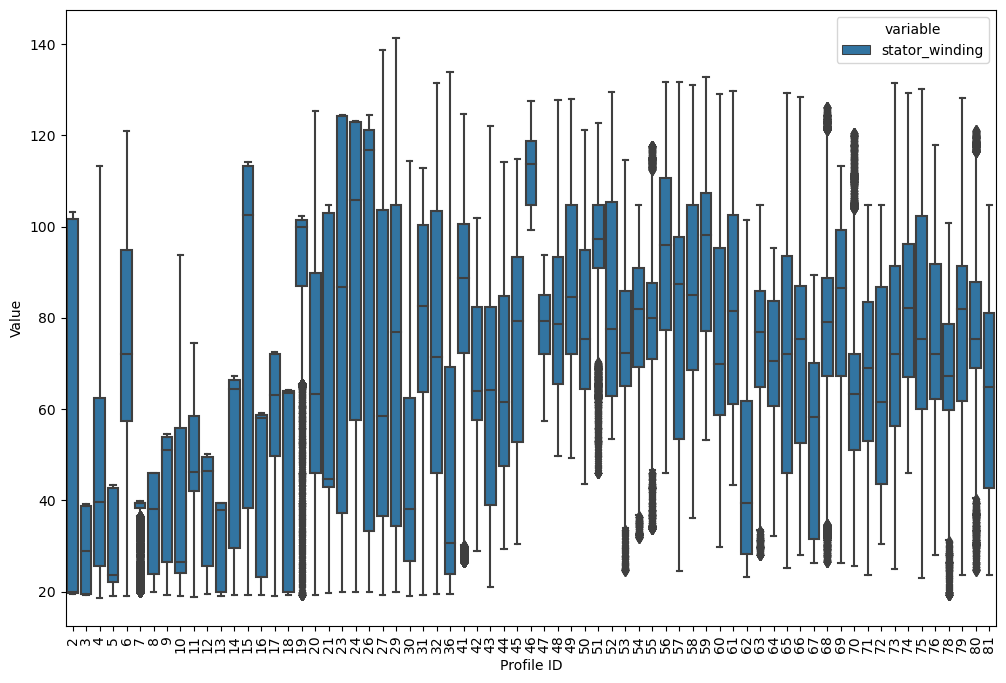

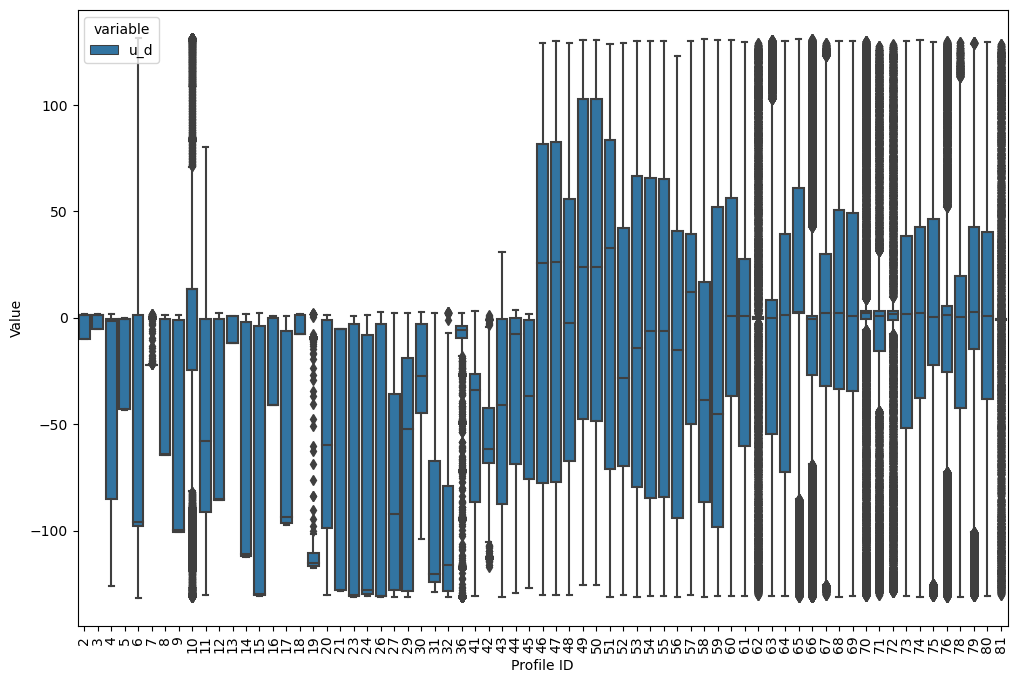

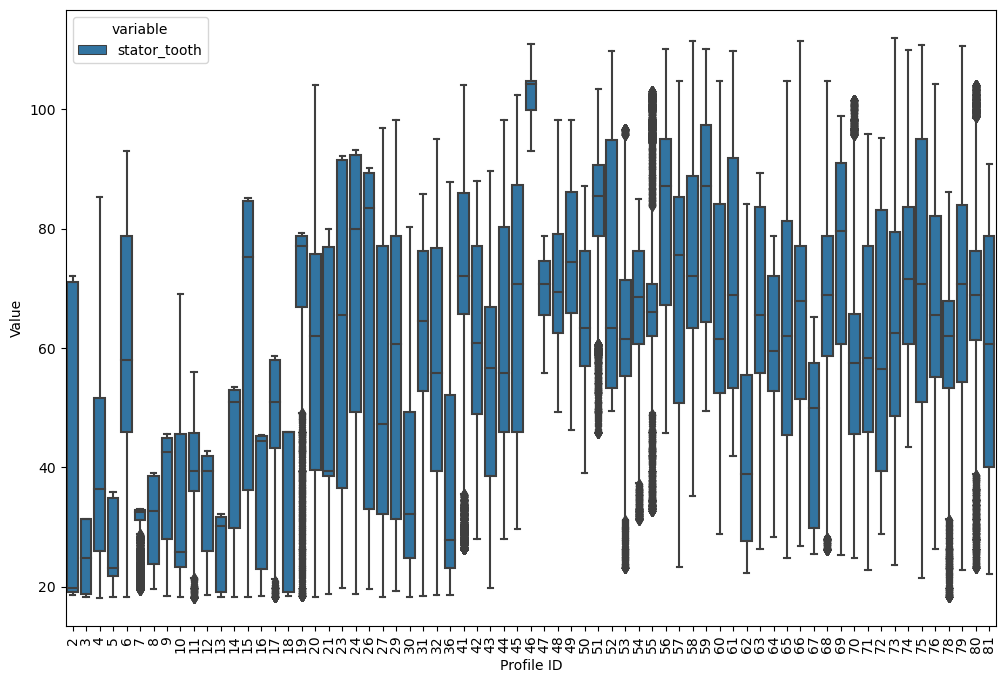

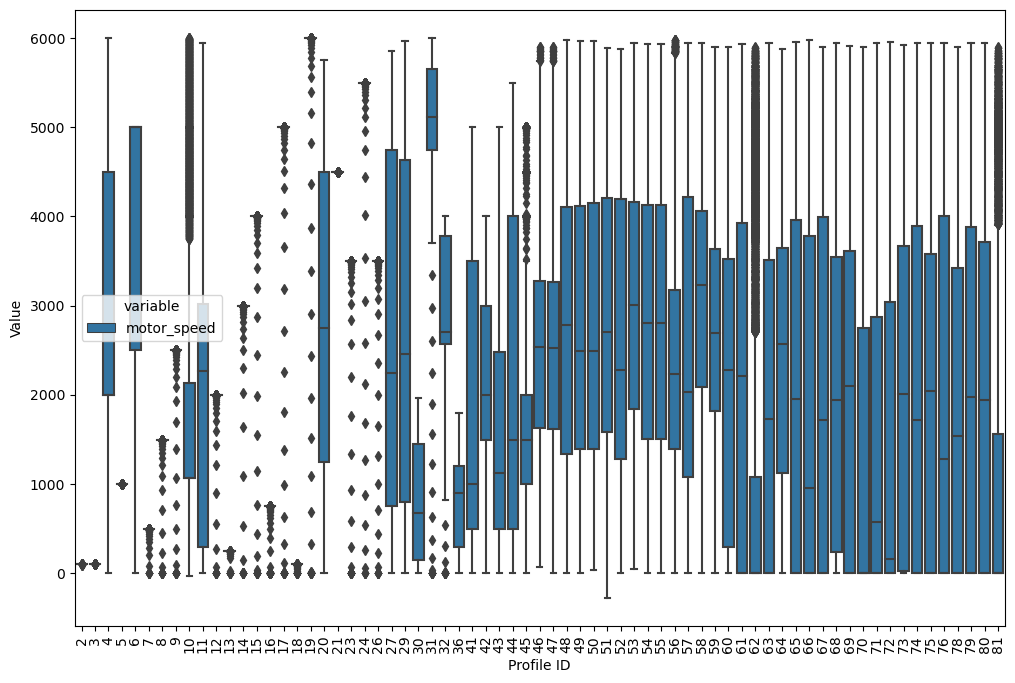

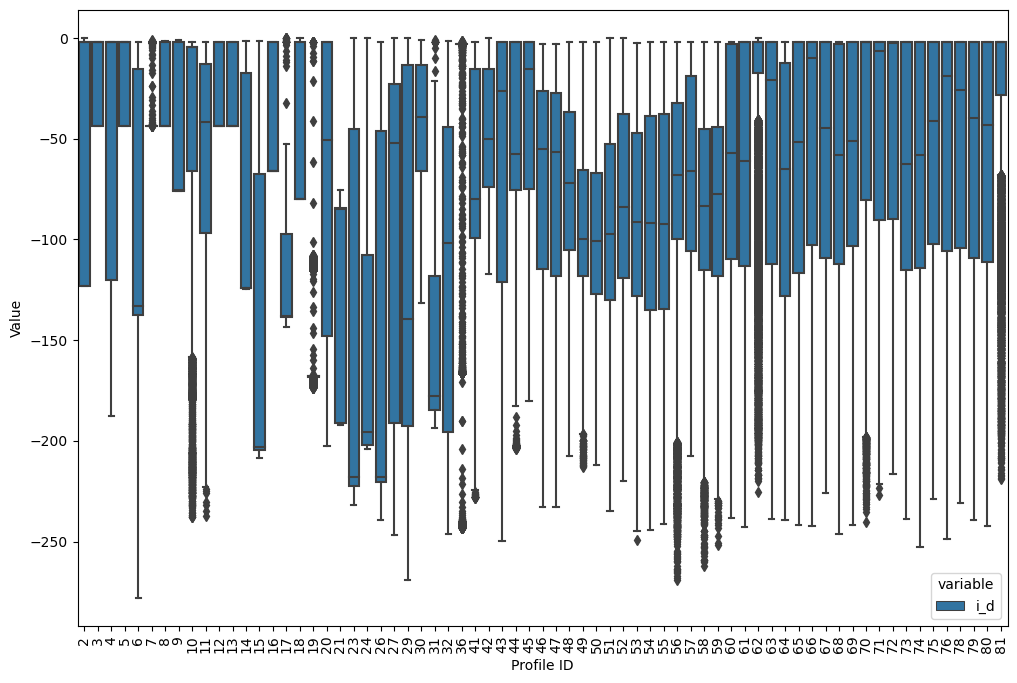

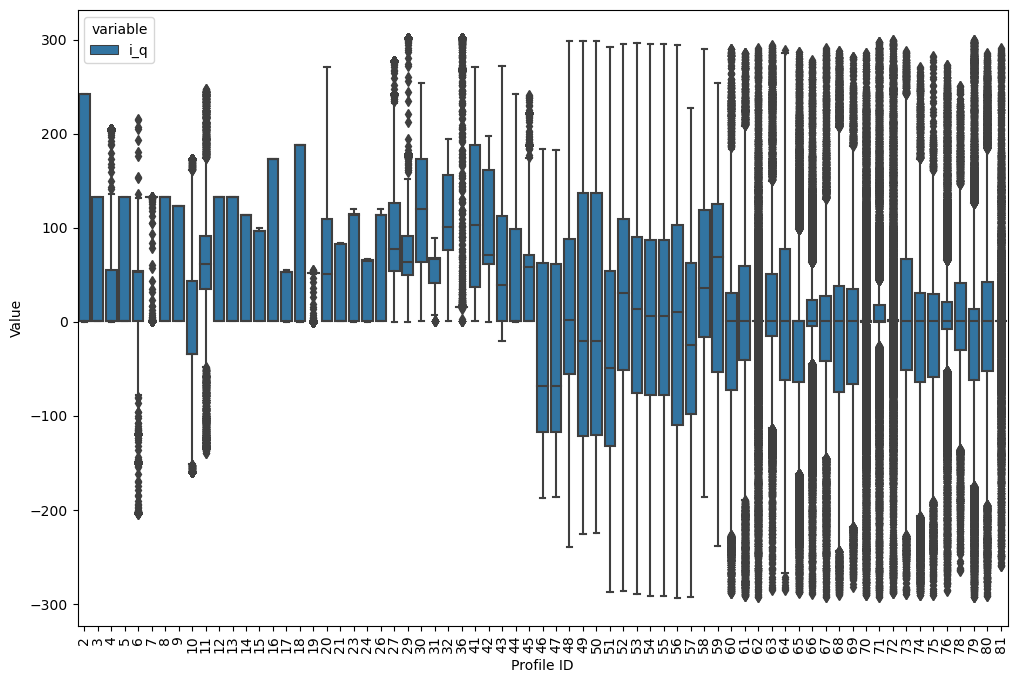

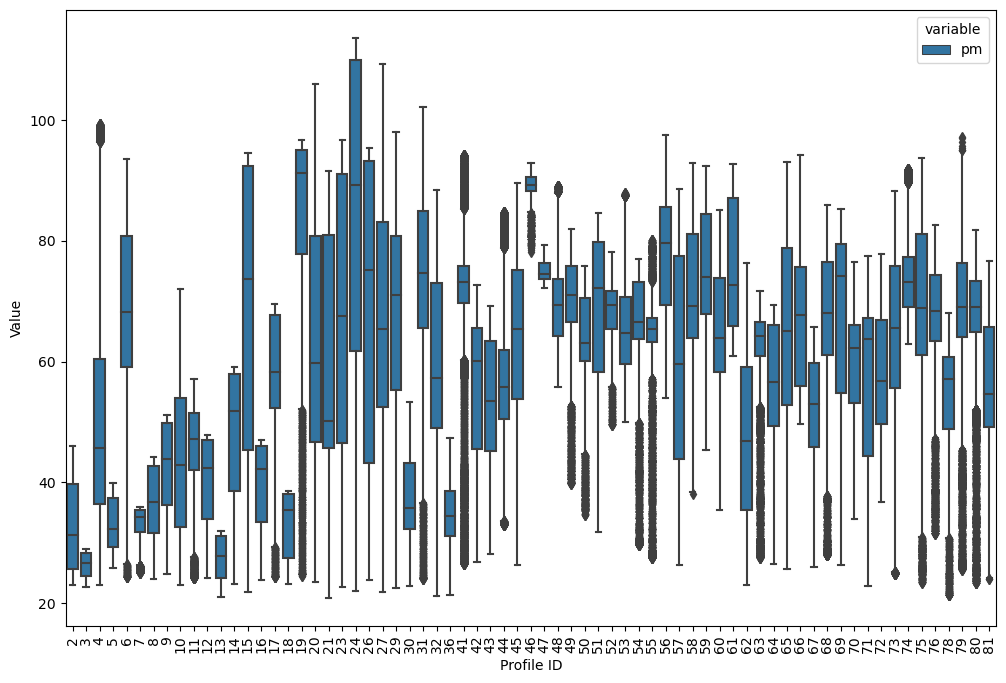

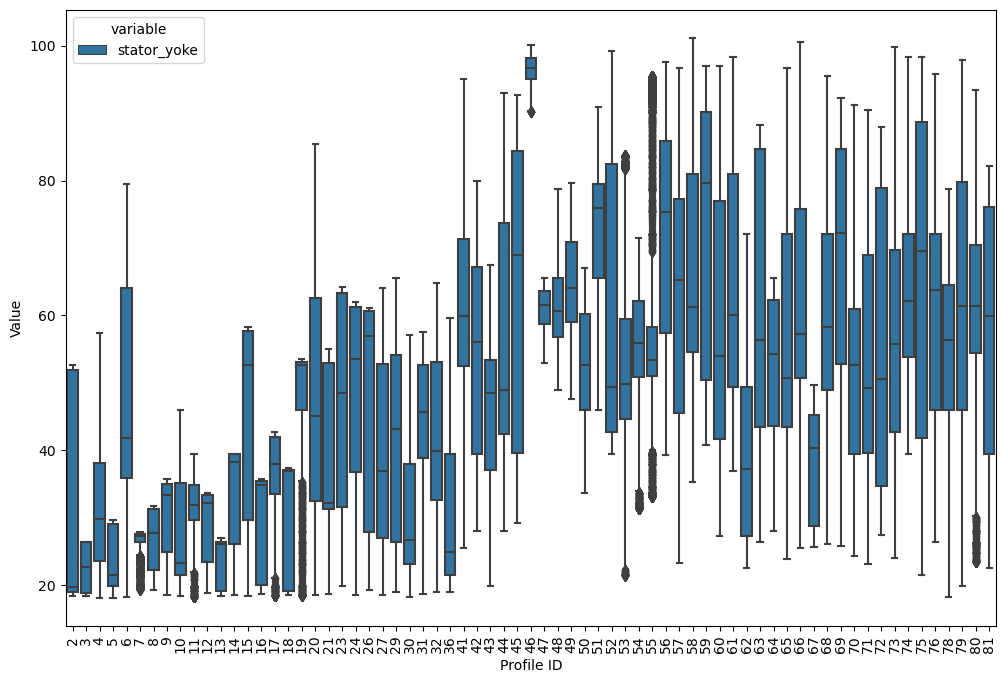

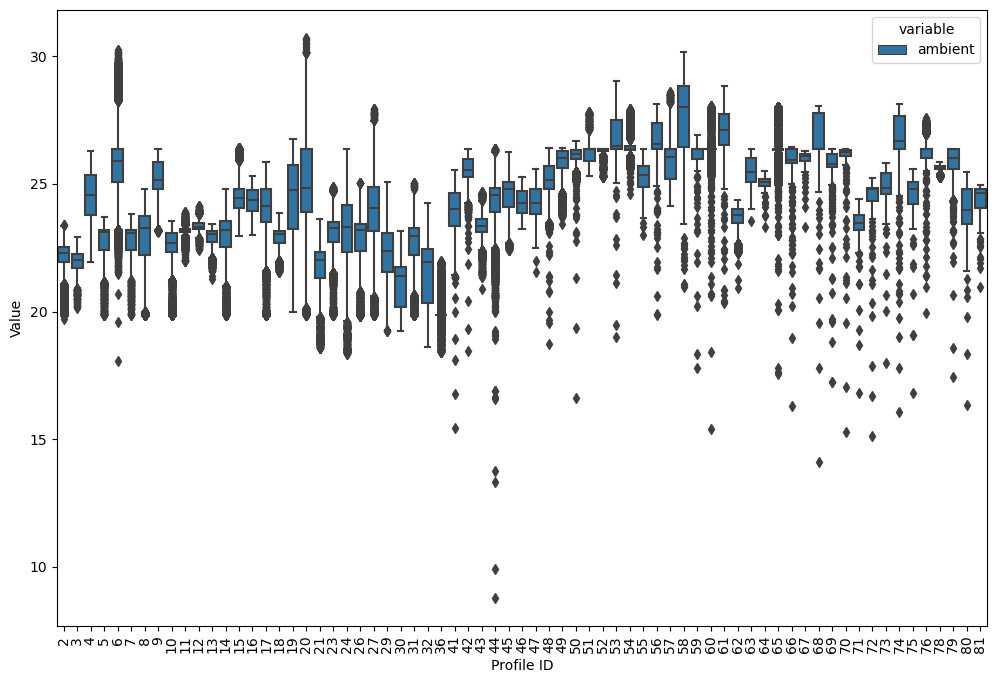

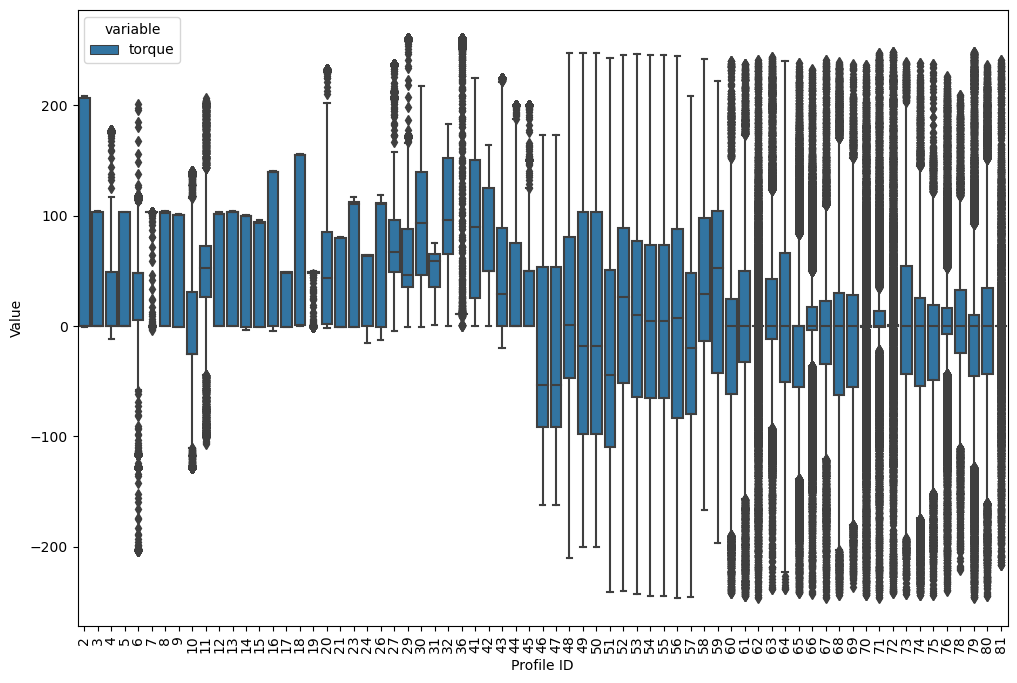

In [39]:
# View box plots of variable data by profile_id
for var in data.columns[~data.columns.isin(['profile_id'])]:
    plt.subplots(figsize=(12, 8))
    sns.boxplot(x='profile_id', y='value', hue='variable', data=melt_by_profile_id(data, var))
    plt.xticks(rotation='vertical')
    plt.ylabel('Value')
    plt.xlabel('Profile ID')

# Data Cleaning

The dataset:
- has no None values
- has no missing values
- is structured in a Dataframe
- has appropriate value types for each column

# Save File

No changes were made to the original dataset, therefore saving a new file is not necessary.

# Summary

I am not concerned about the numerous outliers depicted from the box plots at this time due to the sensor data being collected from a bench test.